In [1]:
import os
import networkx
import numpy as np
from nilearn import image 
from nilearn import plotting 
from nilearn import decomposition
from nilearn.regions import RegionExtractor
from nilearn.connectome import ConnectivityMeasure

In [2]:
path_base = '/home/lussier/Projects/data/simon/'
path_func = 'minimally_preprocessed/'
path_conf = 'minimally_preprocessed/'

In [3]:
# A text file in the functional folder containing the names of the functional files in a single column is used to generate the list for the dypac model.
func = []
func_file = open((os.path.join(path_base,path_func, 'functional.txt')),'r')
for line in func_file:
    func.append(os.path.join(path_base,path_func, (line.strip())))
func_file.close()
print (func)

['/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess005_taskrestrun1_n.nii.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess011_taskrestrun1_n.nii.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess011_taskrestrun2_n.nii.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess013_taskrestrun1_n.nii.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess014_taskrestrun1_n.nii.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess015_taskrestrun1_n.nii.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess016_taskrestrun1_n.nii.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess017_taskrestrun1_n.nii.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess018_taskrestrun1_n.nii.gz', '/home/lussier/Projects/data/simon/minimally_preproces

In [4]:
# A similar text file with the names of the confounds files in the same order as the functional is used to create the confounds file list for the model.
conf = []
conf_file = open((os.path.join(path_base,path_conf, 'confounds.txt')),'r')
for line in conf_file:
    conf.append(os.path.join(path_base,path_conf, (line.strip())))
conf_file.close()
print (conf)

['/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess005_taskrestrun1_n_confounds.tsv.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess011_taskrestrun1_n_confounds.tsv.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess011_taskrestrun2_n_confounds.tsv.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess013_taskrestrun1_n_confounds.tsv.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess014_taskrestrun1_n_confounds.tsv.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess015_taskrestrun1_n_confounds.tsv.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess016_taskrestrun1_n_confounds.tsv.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess017_taskrestrun1_n_confounds.tsv.gz', '/home/lussier/Projects/data/simon/minimally_preprocessed/fmri_sub032633_sess01

In [5]:
#dictionary learning for sample
dict_learn = decomposition.DictLearning(n_components=50, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2, random_state=0,
                standardize=True, mask_strategy='template')
dict_learn.fit(func, confounds=conf)

/home/lussier/.local/lib/python3.6/site-packages/nilearn/decomposition/dict_learning.py:233: UserWarning: Persisting input arguments took 3.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  self.components_init_, data)
/home/lussier/.local/lib/python3.6/site-packages/nilearn/decomposition/dict_learning.py:264: UserWarning: Persisting input arguments took 2.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the 

DictLearning(mask_strategy='template',
             memory=Memory(location=nilearn_cache/joblib), memory_level=2,
             n_components=50, random_state=0, smoothing_fwhm=6.0)

In [6]:
#retrieve components 
components_img = dict_learn.components_img_

/home/lussier/.local/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)
/home/lussier/.local/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: linewidths is ignored by contourf
  **kwargs)


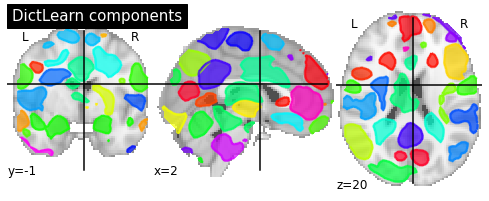

In [7]:
#visualize components on map
plotting.plot_prob_atlas(components_img, view_type='filled_contours',
                         title='DictLearn components')

/home/lussier/.local/lib/python3.6/site-packages/nilearn/plotting/displays.py:602: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  facecolor=facecolor)


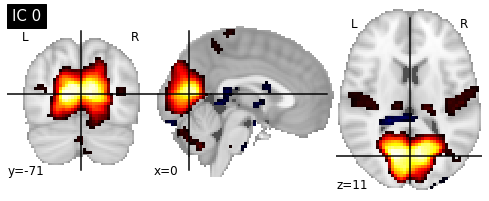

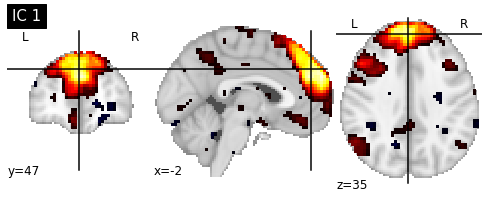

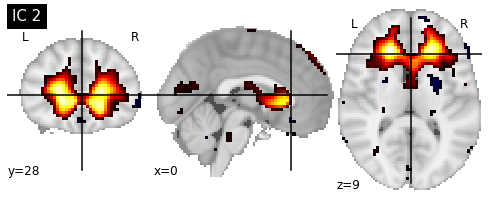

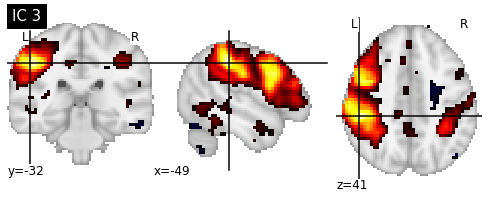

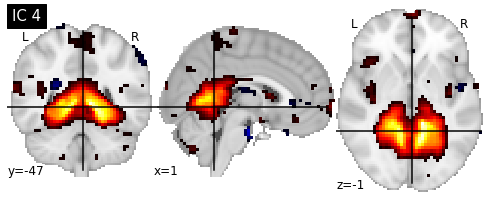

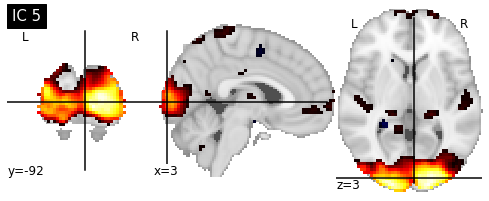

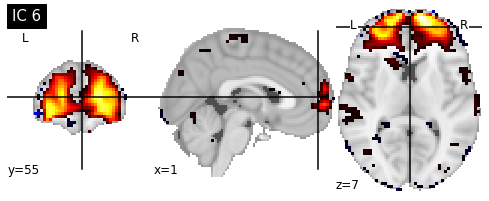

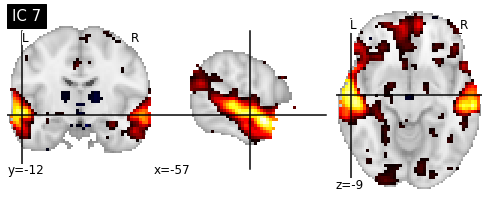

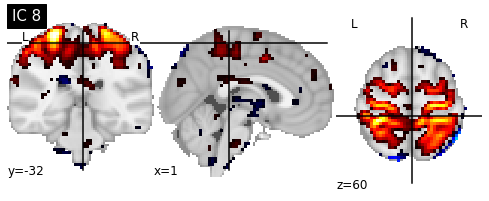

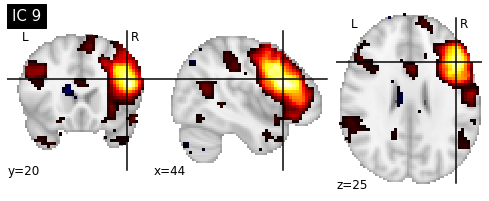

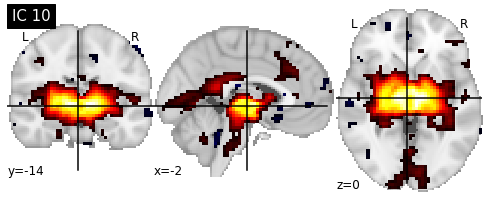

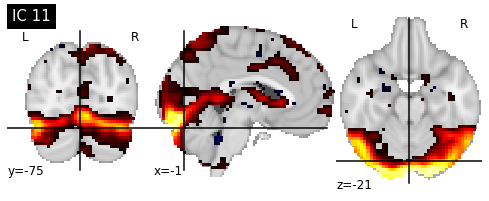

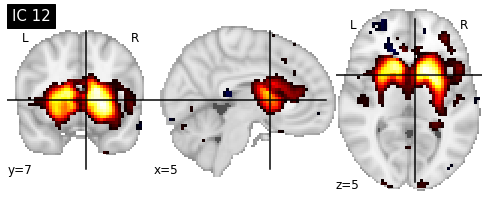

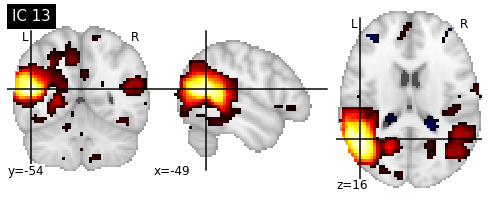

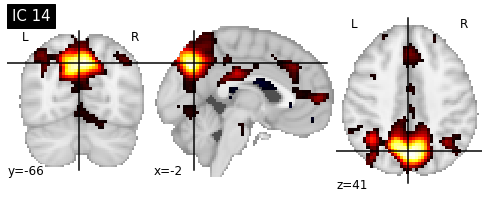

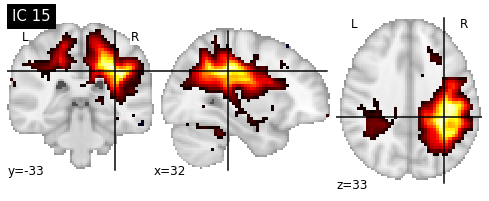

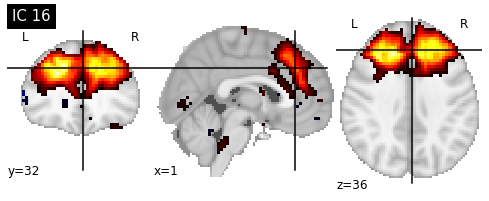

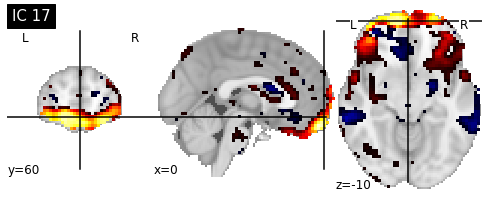

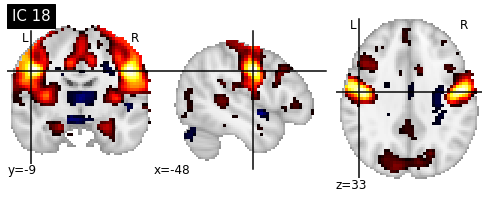

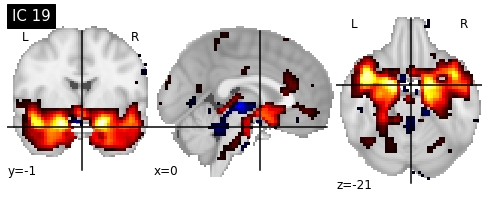

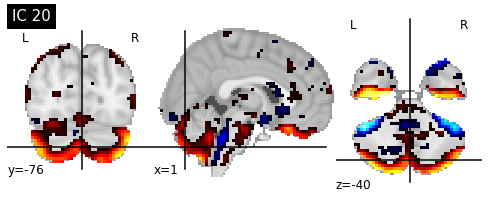

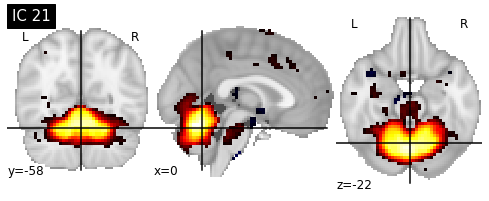

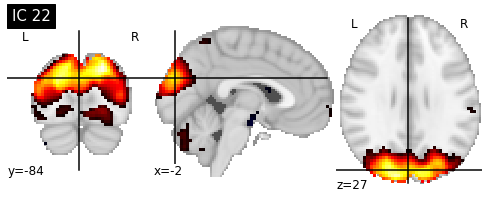

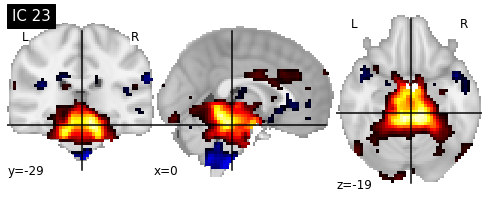

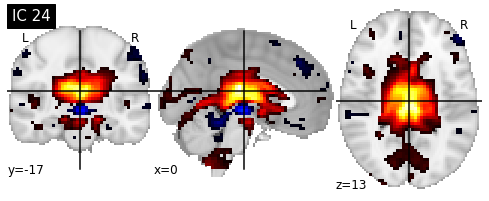

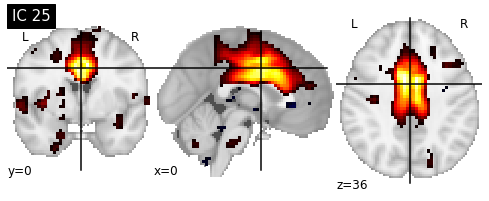

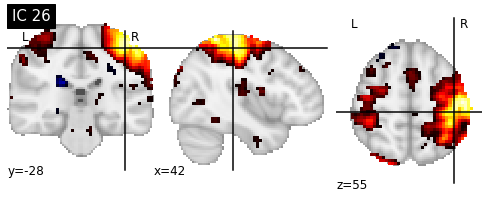

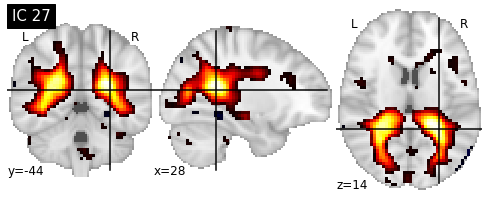

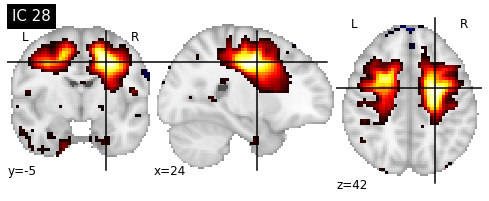

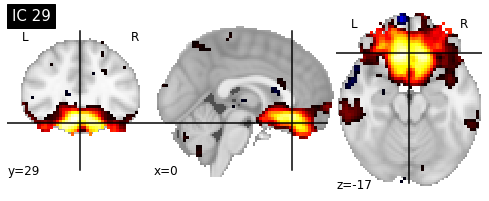

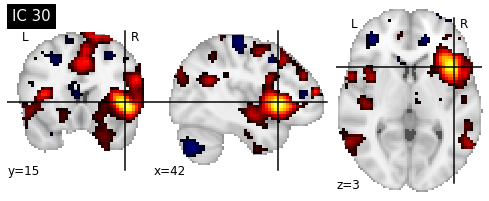

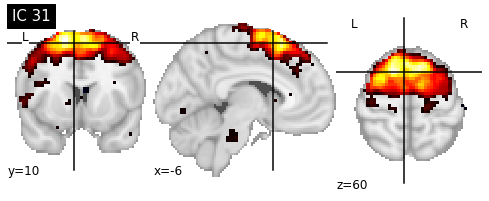

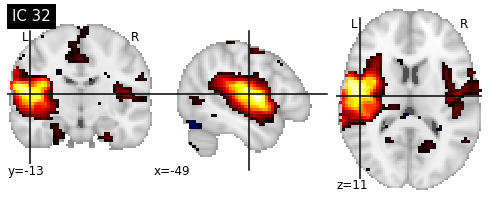

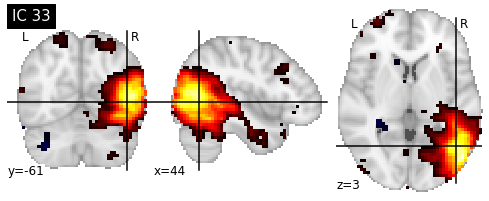

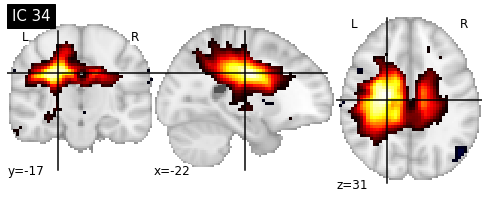

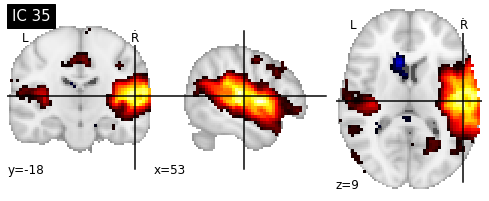

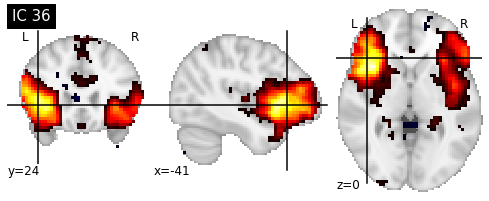

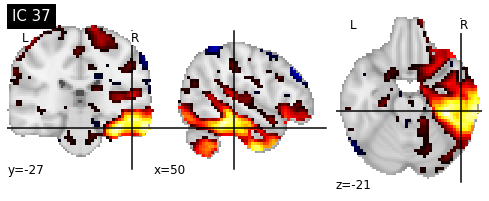

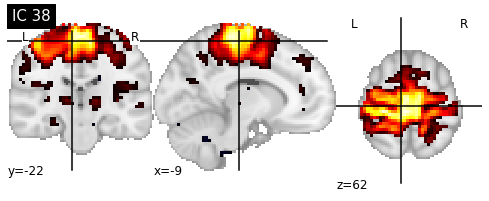

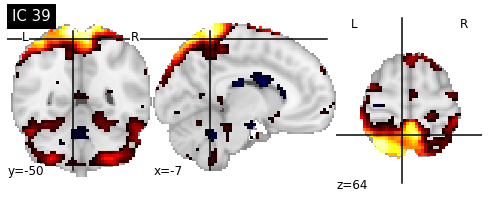

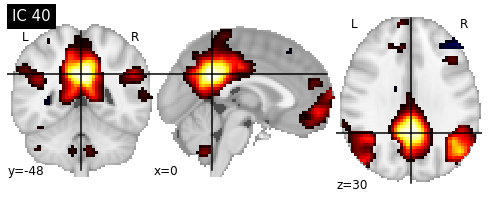

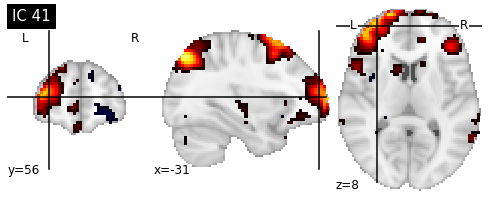

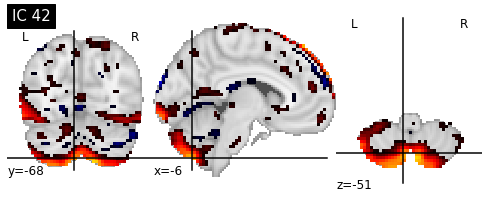

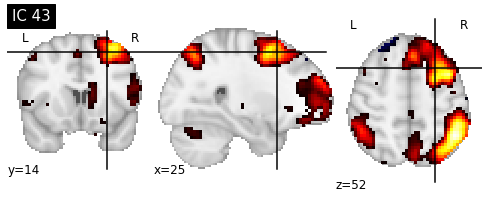

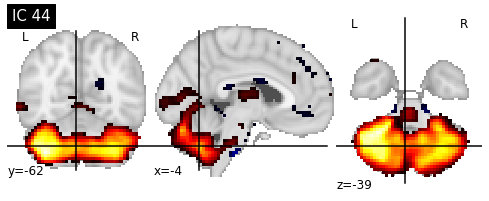

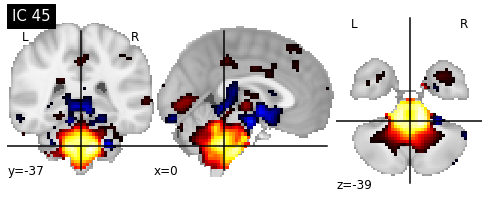

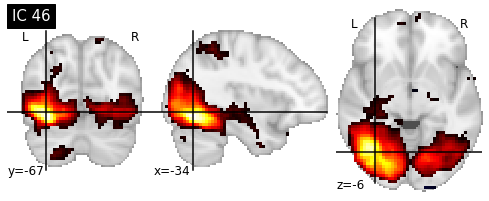

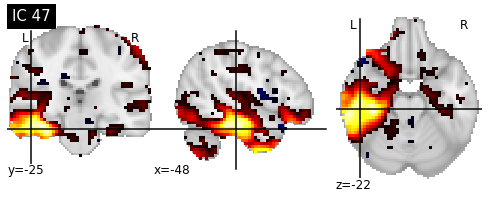

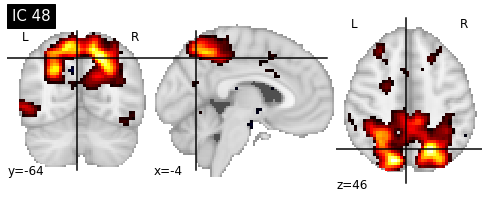

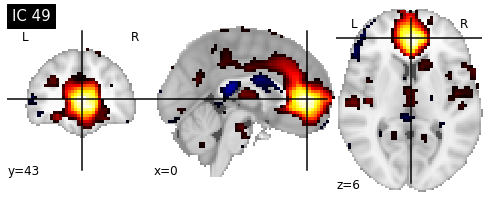

In [8]:
#interate through the components and plot them
for i, cur_img in enumerate(image.iter_img(components_img)):
    plotting.plot_stat_map(cur_img, title="IC %d" % i,
                   colorbar=False)
plotting.show()